In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df=pd.read_csv("PEA01.20231007T221014.csv")

In [3]:
df.head(10)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
5,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,NaN
6,Population Estimates (Persons in April),1950,0 - 14 years,Both sexes,Thousand,851.2
7,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
8,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1


In [4]:
df.tail(10)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
5984,Population Estimates (Persons in April),2023,75 - 79 years,Female,Thousand,84.3
5985,Population Estimates (Persons in April),2023,80 - 84 years,Both sexes,Thousand,101.8
5986,Population Estimates (Persons in April),2023,80 - 84 years,Male,Thousand,46.1
5987,Population Estimates (Persons in April),2023,80 - 84 years,Female,Thousand,55.6
5988,Population Estimates (Persons in April),2023,85 years and over,Both sexes,Thousand,87.1
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33.1
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,53.9
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
5993,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [5]:
df.describe(include="object")

,STATISTIC Label,Age Group,Sex,UNIT
count,5994,5994,5994,5994
unique,1,27,3,1
top,Population Estimates (Persons in April),Under 1 year,Both sexes,Thousand
freq,5994,222,1998,5994


In [6]:
df.describe()

,Year,VALUE
count,5994.000000,5880.000000
mean,1986.500000,347.001088
std,21.361791,601.822682
min,1950.000000,5.500000
25%,1968.000000,79.475000
50%,1986.500000,151.700000
75%,2005.000000,307.725000
max,2023.000000,5281.600000


In [7]:
df.shape

(5994, 6)

In [8]:
df.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [10]:
df.nunique()

STATISTIC Label       1
Year                 74
Age Group            27
Sex                   3
UNIT                  1
VALUE              3387
dtype: int64

In [11]:
df.isnull().sum()

STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64

In [12]:
df.count()

STATISTIC Label    5994
Year               5994
Age Group          5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
to_drop=["STATISTIC Label","UNIT"] 

In [15]:
df.drop(columns=to_drop,inplace=True)

In [16]:
df=df.rename(columns={"VALUE":"Value"})

In [17]:
#df["Value"]=df["Value"]*1000
#df["Value"]=df["Value"]/100

In [18]:
df

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


In [19]:
missing_df=df[df.isna().any(axis=1)] #missing data rows

In [20]:
missing_df

,Year,Age Group,Sex,Value
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
5,1950,0 - 4 years,Female,NaN
165,1952,0 - 4 years,Both sexes,NaN
166,1952,0 - 4 years,Male,NaN
...,...,...,...,...
3568,1994,0 - 4 years,Male,NaN
3569,1994,0 - 4 years,Female,NaN
3648,1995,0 - 4 years,Both sexes,NaN
3649,1995,0 - 4 years,Male,NaN


In [21]:
df=df.dropna()

In [22]:
df.head(10)

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6
8,1950,0 - 14 years,Female,416.6
9,1950,1 - 4 years,Both sexes,249.1
10,1950,1 - 4 years,Male,127.5
11,1950,1 - 4 years,Female,121.6
12,1950,5 - 9 years,Both sexes,278.9


In [23]:
df.count()

Year         5880
Age Group    5880
Sex          5880
Value        5880
dtype: int64

<Axes: xlabel='Value'>

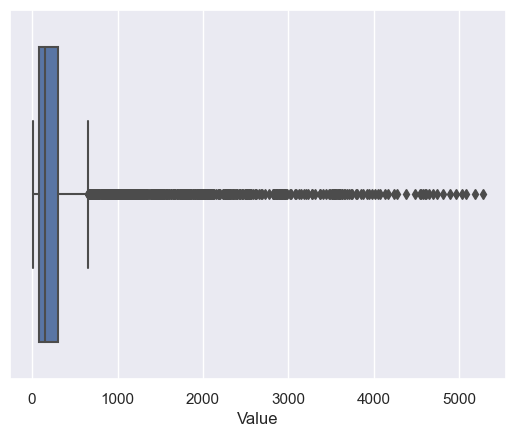

In [24]:
sns.boxplot(x=df["Value"])

In [25]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year      37.00
Value    228.25
dtype: float64


C:\Users\TUNA\AppData\Local\Temp\ipykernel_15924\2377082437.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\TUNA\AppData\Local\Temp\ipykernel_15924\2377082437.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
outliers = (df < lower_bound) | (df > upper_bound)

C:\Users\TUNA\AppData\Local\Temp\ipykernel_15924\2729132471.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_bound) | (df > upper_bound)


In [28]:
outliers_df = df[outliers.any(axis=1)]

In [29]:
outliers_df

,Year,Age Group,Sex,Value
6,1950,0 - 14 years,Both sexes,851.2
24,1950,15 years and over,Both sexes,2117.8
25,1950,15 years and over,Male,1075.4
26,1950,15 years and over,Female,1042.4
33,1950,25 - 44 years,Both sexes,773.6
...,...,...,...,...
5963,2023,45 - 64 years,Female,677.2
5976,2023,65 years and over,Both sexes,806.3
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


In [30]:
df

,Year,Age Group,Sex,Value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6
...,...,...,...,...
5989,2023,85 years and over,Male,33.1
5990,2023,85 years and over,Female,53.9
5991,2023,All ages,Both sexes,5281.6
5992,2023,All ages,Male,2606.2


array([[<Axes: title={'center': 'Value'}>]], dtype=object)

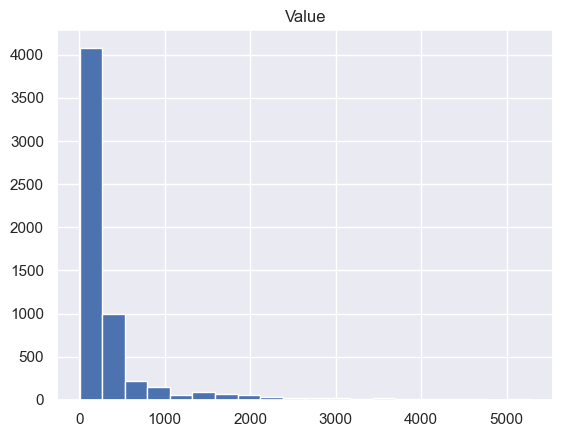

In [31]:
df.hist(column="Value",bins=20)

In [32]:
df["Age Group"].unique()

array(['Under 1 year', '0 - 14 years', '1 - 4 years', '5 - 9 years',
       '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages', '0 - 4 years'], dtype=object)

In [33]:
Age_Group_Value_Counts=pd.crosstab(index=df["Age Group"],columns="Value")

In [34]:
Age_Group_Value_Counts

col_0,Value
Age Group,
0 - 14 years,222
0 - 4 years,108
1 - 4 years,222
10 - 14 years,222
15 - 19 years,222
15 - 24 years,222
15 years and over,222
20 - 24 years,222
25 - 29 years,222


In [35]:
from numpy import median, mean

In [36]:
sns.set(style="whitegrid")

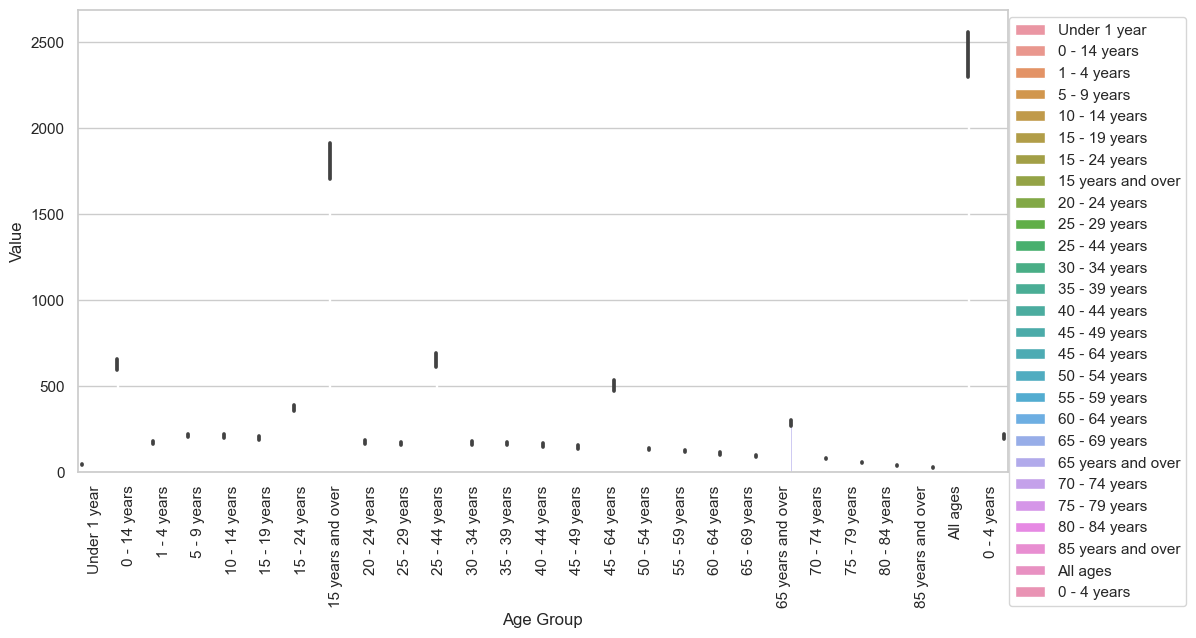

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Age Group", y="Value", hue="Age Group", data=df)
plt.xticks(rotation=90)
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

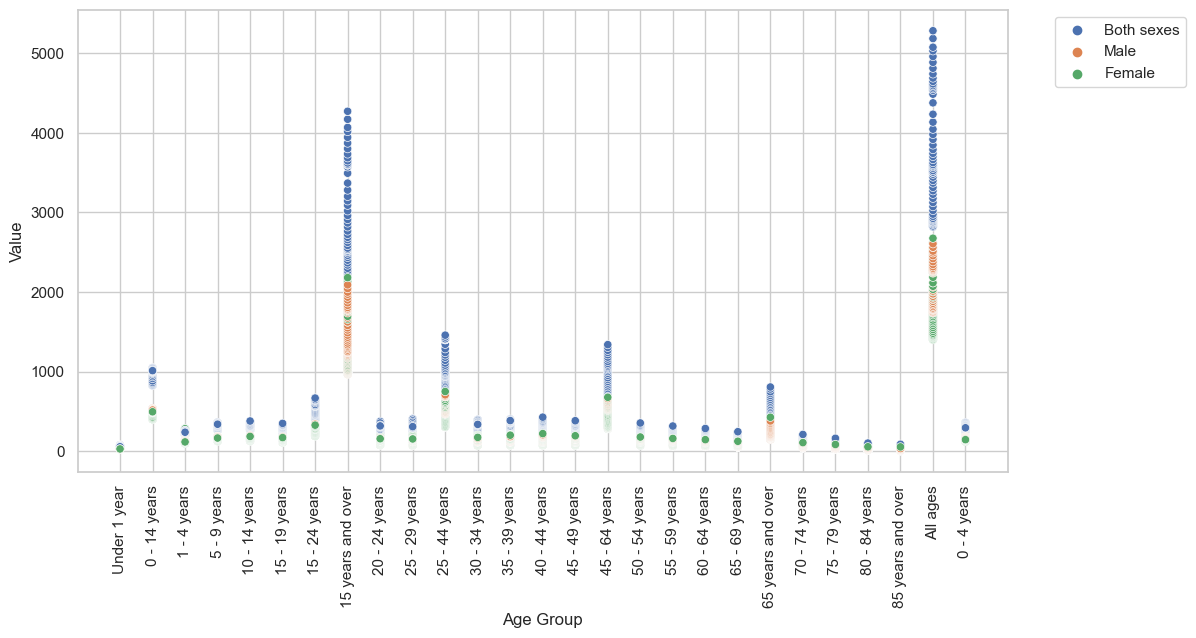

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Age Group",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))

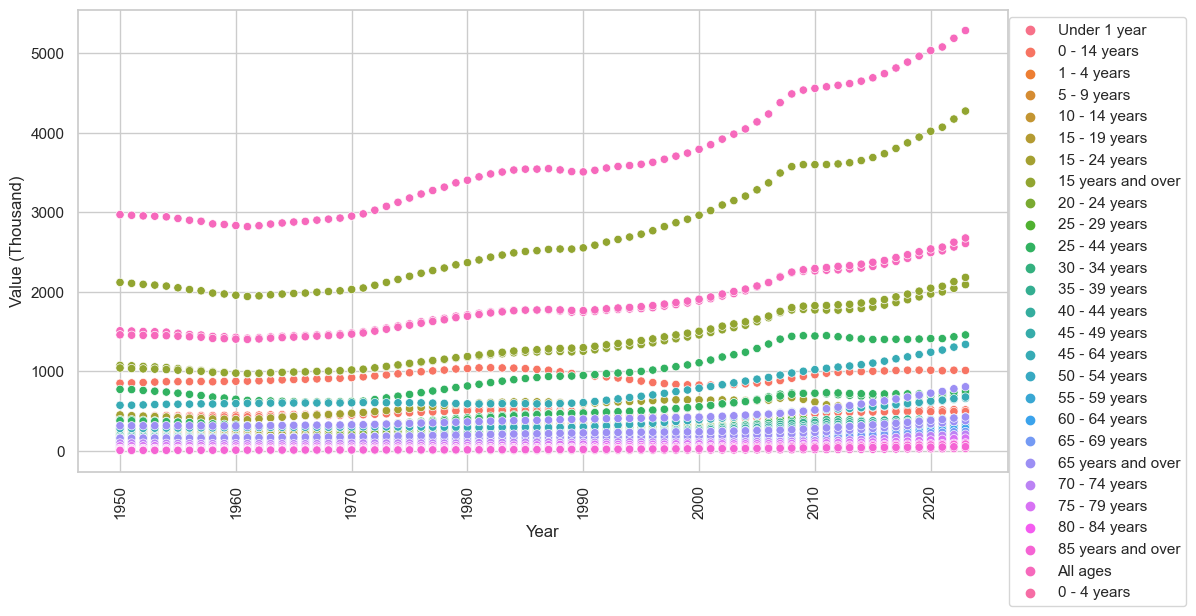

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Year",y="Value",hue="Age Group");
plt.ylabel("Value (Thousand)")
plt.xticks(rotation=90);
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1));

In [61]:
import math
subset_0_14_years=df[(df["Age Group"]=="0 - 14 years")]
print(subset_0_14_years,"\n\n")
print("Minimum value:\n",subset_0_14_years.min(),"\n")
print("Maximum value:\n",subset_0_14_years.max(),"\n")

      Year     Age Group         Sex   Value
6     1950  0 - 14 years  Both sexes   851.2
7     1950  0 - 14 years        Male   434.6
8     1950  0 - 14 years      Female   416.6
87    1951  0 - 14 years  Both sexes   854.8
88    1951  0 - 14 years        Male   436.4
...    ...           ...         ...     ...
5839  2022  0 - 14 years        Male   519.0
5840  2022  0 - 14 years      Female   495.3
5919  2023  0 - 14 years  Both sexes  1011.6
5920  2023  0 - 14 years        Male   516.5
5921  2023  0 - 14 years      Female   495.1

[222 rows x 4 columns] 


Minimum value:
 Year                 1950
Age Group    0 - 14 years
Sex            Both sexes
Value               402.6
dtype: object 

Maximum value:
 Year                 2023
Age Group    0 - 14 years
Sex                  Male
Value              1045.4
dtype: object 



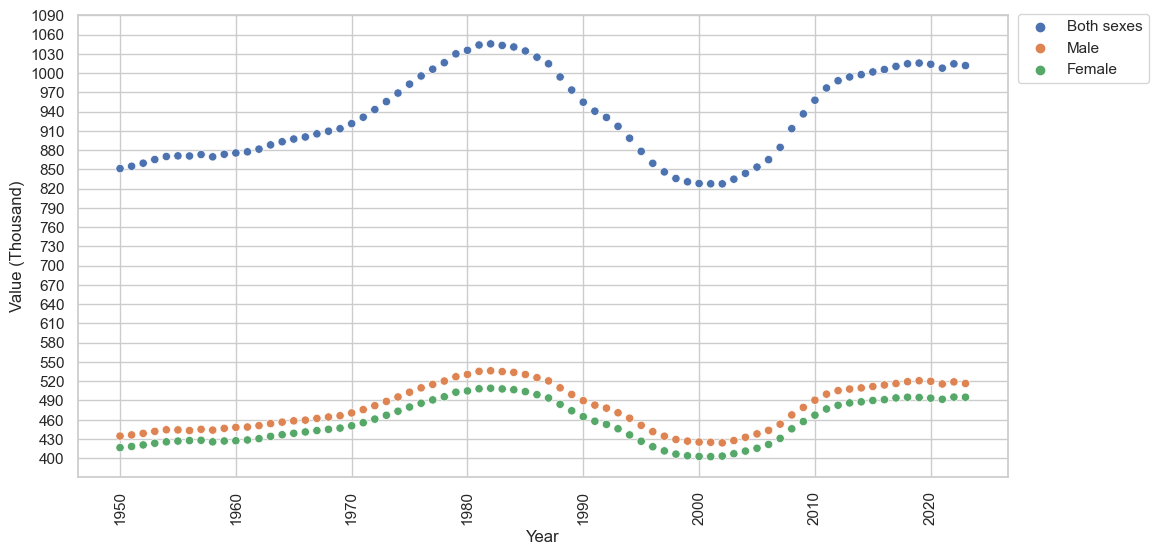

In [77]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
#max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
max_value=subset_0_14_years["Value"].apply(lambda x: math.ceil(x/100)*100).max()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

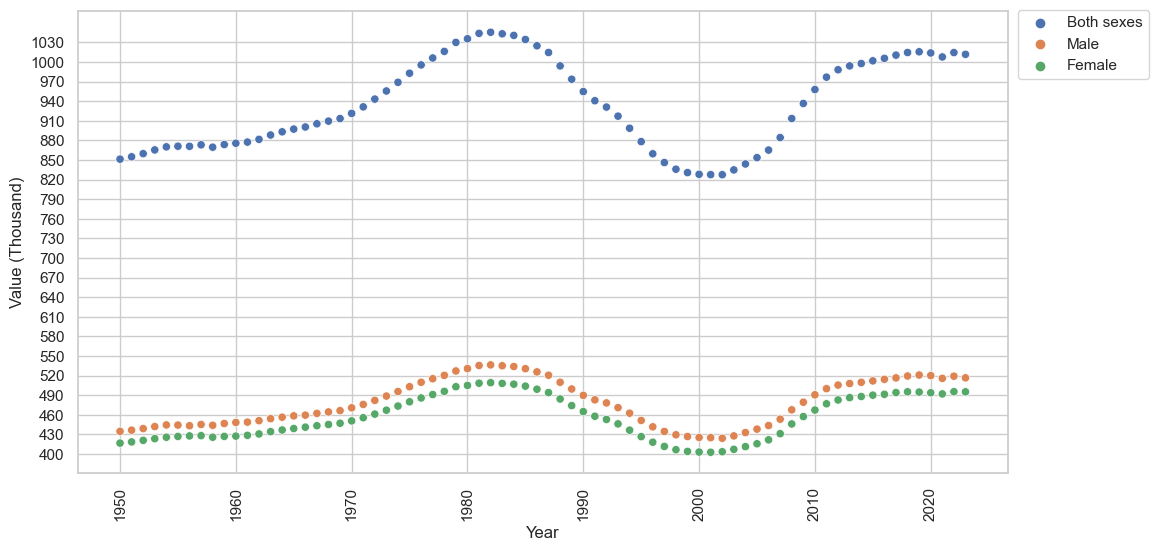

In [75]:
#min_value=(subset_0_14_years["Value"].apply(math.ceil).min())-1
max_value=subset_0_14_years["Value"].max()
min_value=subset_0_14_years["Value"].apply(lambda x: (math.ceil(x/100)*100)-100).min()
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")

plt.yticks(np.arange(min_value, max_value, step=30))
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

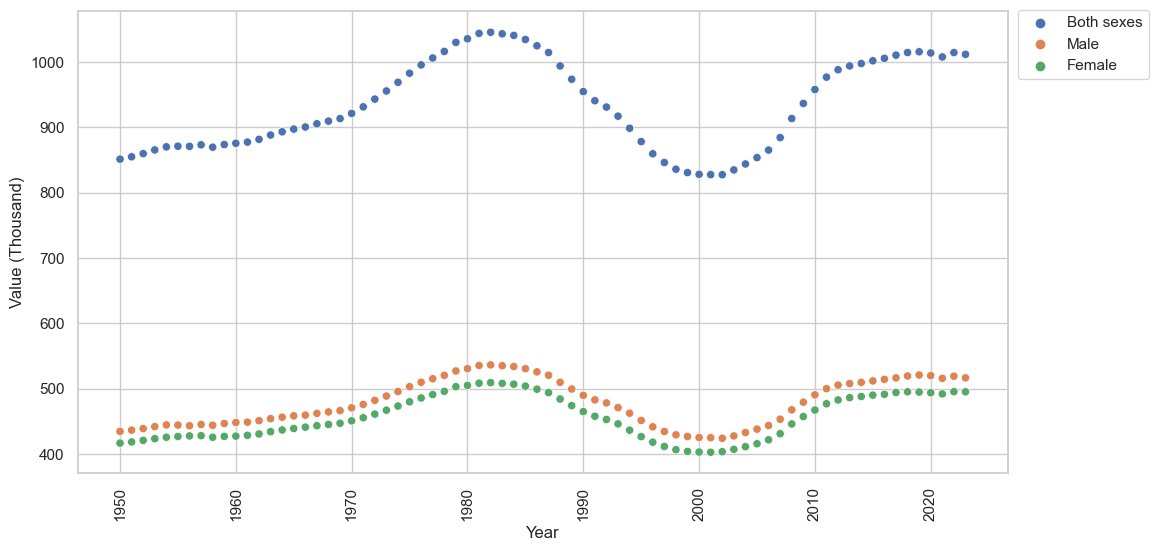

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=subset_0_14_years,x="Year",y="Value",hue="Sex");
plt.xticks(rotation=90);
plt.ylabel("Value (Thousand)")
plt.legend(loc="upper right",bbox_to_anchor=(1.16,1.02));

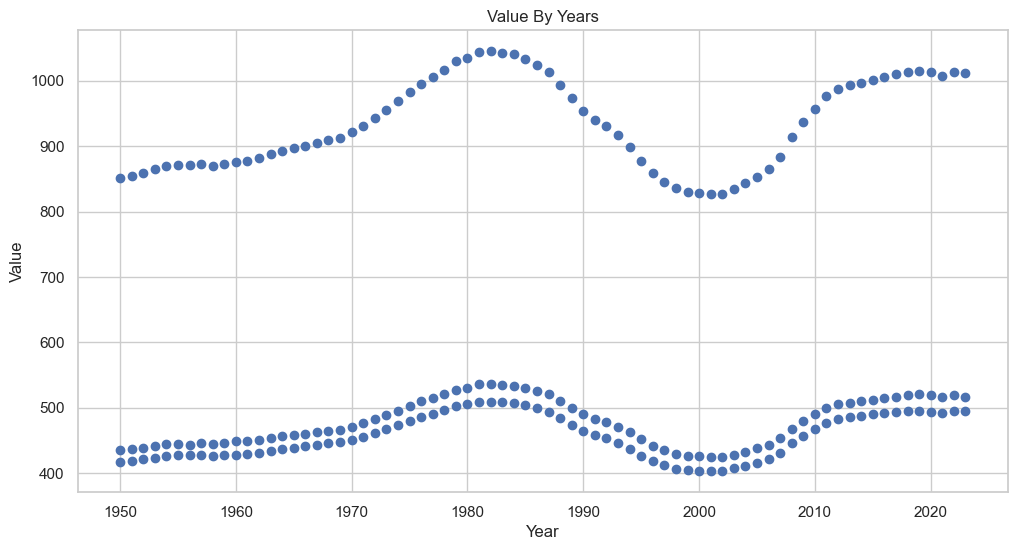

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(subset_0_14_years["Year"], subset_0_14_years["Value"])
ax.set_title("Value By Years")
ax.set_xlabel("Year")
ax.set_ylabel("Value")
plt.show()

In [43]:
subset_0_4_years=df[(df["Age Group"]=="0 - 4 years") & (df["Sex"]=="Male")]
print(subset_0_4_years.head(),"\n\n")
print("Minimum value:\n",subset_0_4_years.min(),"\n")
print("Maximum value:\n",subset_0_4_years.max(),"\n")

      Year    Age Group   Sex  Value
85    1951  0 - 4 years  Male  160.0
895   1961  0 - 4 years  Male  153.4
1300  1966  0 - 4 years  Male  161.3
1705  1971  0 - 4 years  Male  161.8
2353  1979  0 - 4 years  Male  175.6 


Minimum value:
 Year                1951
Age Group    0 - 4 years
Sex                 Male
Value              128.7
dtype: object 

Maximum value:
 Year                2023
Age Group    0 - 4 years
Sex                 Male
Value              182.7
dtype: object 



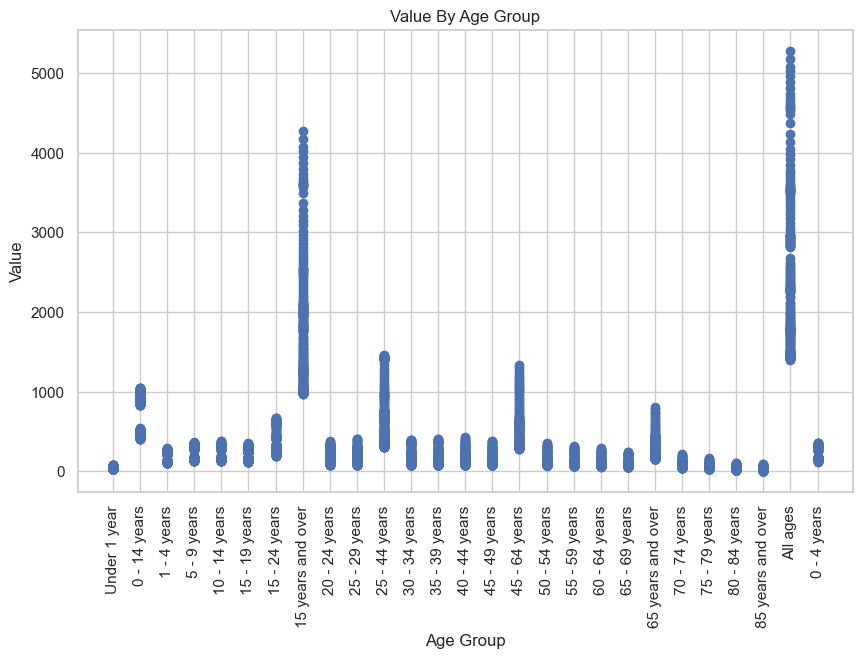

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"], df["Value"])
ax.set_xlabel("Age Group")
plt.xticks(rotation=90)
ax.set_ylabel("Value")
plt.title("Value By Age Group")
plt.show()

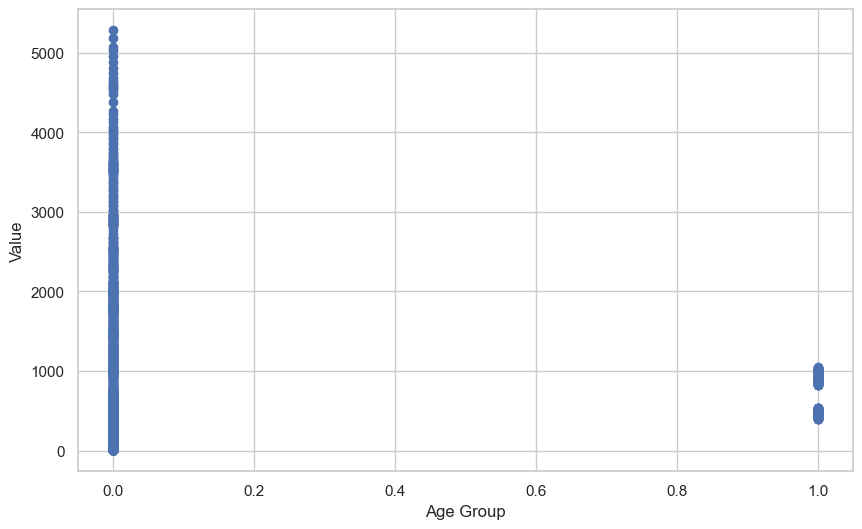

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Age Group"]=="0 - 14 years", df["Value"])
ax.set_xlabel("Age Group")
ax.set_ylabel("Value")
plt.show()

In [46]:

# # Kategorik verileri sayısal olarak kodlayalım
# df['Age Group Code'] = pd.Categorical(df['Age Group']).codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()




In [47]:
# df["Age Group"].unique()

In [48]:
# # Belirlediğiniz renk listesi
# colors = ['red', 'green', 'blue', 'orange', 'purple']

# # Her bir "Age Group" kategorisi için "VALUE" sütununun ortalamasını hesaplayalım
# grouped_data = df.groupby('Age Group')['Value'].mean()

# # Çubuk grafik oluşturalım ve belirlediğiniz renkleri kullanalım
# fig, ax = plt.subplots(figsize=(10, 6))
# grouped_data.plot(kind='bar', ax=ax, color=colors)
# ax.set_xlabel("Age Group")
# ax.set_ylabel("Average Value")
# plt.show()

In [49]:
# # Kategorik verileri sayısal olarak kodlayalım
# age_group_order = [
#     'Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years', '5 - 9 years', '10 - 14 years',
#     '15 - 19 years', '15 - 24 years', '15 years and over', '20 - 24 years',
#     '25 - 29 years', '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
#     '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
#     '60 - 64 years', '65 - 69 years', '65 years and over', '70 - 74 years',
#     '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages'
# ]

# df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_group_order, ordered=True)
# df['Age Group Code'] = df['Age Group'].cat.codes

# # Sütunları x, y ve renk olarak kullanarak scatter plot oluşturun
# fig, ax = plt.subplots(figsize=(12, 10))
# scatter = ax.scatter(df["Year"], df["Value"], c=df["Age Group Code"], cmap='viridis', marker='o')

# # Renk skalasını oluşturun ve eksen etiketlerini ayarlayın
# cbar = plt.colorbar(scatter)
# cbar.set_label("Age Group")
# ax.set_xlabel("Year")
# ax.set_ylabel("Value")
# plt.show()